# K means clustering 시각화
[참고 블로그](http://benalexkeen.com/k-means-clustering-in-python/)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
%matplotlib inline

# 테스트 

## 처음에 시도했던 점 뿌리기

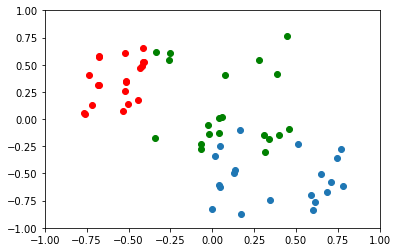

In [2]:
np.random.seed(201)
x1 = np.random.uniform(-0.1, 0.9, size=20)
y1 = np.random.uniform(-0.9, -0.1, size=20)
x2 = np.random.uniform(-0.8, -0.4, size=20)
y2 = np.random.uniform(0, 0.7, size=20)
x3 = np.random.uniform(-0.35, 0.5, size=20)
y3 = np.random.uniform(-0.4, 0.9, size=20)
plt.scatter(x1, y1)
plt.scatter(x2, y2, c='red')
plt.scatter(x3, y3, c='green')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show();
plt.close()

## normal을 사용한 점뿌리기
[참고 아티클](http://blog.mpacula.com/2011/04/27/k-means-clustering-example-python/)

세 그룹의 합 points의 shape : (600, 2)


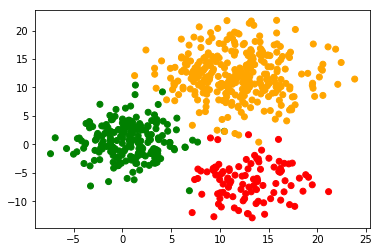

In [3]:
np.random.seed(201)
pt1 = np.random.normal(1, 3, size=(200, 2))
pt2 = np.random.normal(2, 4, size=(300, 2))
pt2 += 10
pt3 = np.random.normal(3, 3, size=(100, 2))
pt3[:,0] += 10
pt3[:,1] -= 10
colors = ['green'] * 200 + ['orange'] * 300 + ['red'] * 100
points = np.concatenate((pt1, pt2, pt3))
print("세 그룹의 합 points의 shape :", points.shape)
plt.scatter(points[:,0], points[:,1], c=colors)
plt.show();
plt.close()

# 실제

```python
pt2 = np.random.normal(2, 4, size=(300, 2))
pt2 += 10
```
이렇게 하기 귀찮아서 함수를 하나 만들고, 편하려고 `DataFrame`으로 관리함

In [4]:
def generate_points(mean, var, size, move):
    """
    size : 2차원 튜플
    move : [x축 이동 거리, y축 이동 거리]
    """
    points = np.random.normal(mean, var, size=size)
    points[:, 0] += move[0]
    points[:, 1] += move[1]
    return points

## 군집 3개 init

In [5]:
np.random.seed(42)
k = 3
pt1 = generate_points(1, 3, (200, 2), (0, 0))
pt2 = generate_points(2, 4, (300, 2), (10, 10))
pt3 = generate_points(3, 3, (100, 2), (10, -10))

## 초깃값 시각화

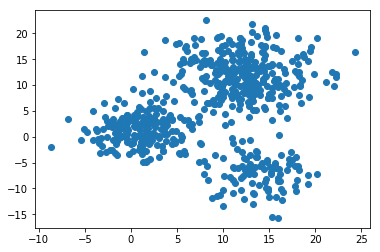

In [6]:
points = np.concatenate((pt1, pt2, pt3))
df = DataFrame(points, columns=['x', 'y'])
plt.scatter(df['x'], df['y'])
plt.show();
plt.close()

In [7]:
df.head()

,x,y
0,2.490142,0.585207
1,2.943066,5.569090
2,0.297540,0.297589
3,5.737638,3.302304
4,-0.408423,2.627680


## 센트로이드 정하기

### min, max정해주기
그래야 센트로이드가 이상한 곳에 찍히지 않는다.

In [8]:
print("min값\n", df.min(), "\n")
print("max값\n", df.max())

min값
 x    -8.723802
y   -15.688766
dtype: float64 

max값
 x    24.315523
y    22.529528
dtype: float64


In [9]:
init_xy = list(zip(df.min(), df.max()))

### 센트로이드 정해주기
마법의 애스터리스크(`*`)

In [10]:
np.random.seed(200)
centers = {
    i+1: [np.random.randint(*init_xy[0]), np.random.randint(*init_xy[1])]
    for i in range(k)
}
centers

{1: [18, 1], 2: [-4, -3], 3: [7, 10]}

### 센트로이드 시각화

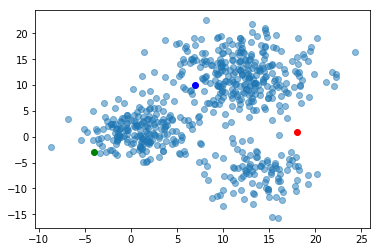

In [11]:
color_map = {
    1: 'r',
    2: 'g',
    3: 'b',
}
plt.scatter(df['x'], df['y'], alpha=0.5)
for i in centers.keys():
    plt.scatter(*centers[i], c=color_map[i])
plt.show();
plt.close()

## 각 점들에 대해 센트로이드 배정하기
하나하나의 점들에 대해 모든 센트로이드과의 거리를 구해 가장 가까운 센트로이드의 `id`와 `color`값을 업데이트한다.

### 거리구하기

In [12]:
def update_distance(df, centers):
    for i in centers.keys():
        df['from_{}'.format(i)] = np.sqrt((df['x'] - centers[i][0]) ** 2 + (df['y'] - centers[i][1]) ** 2)
    return df

### 배정하기

In [13]:
def assign_center(df):
    df['closet'] = df.ix[:, ['from_1', 'from_2', 'from_3']].idxmin(axis=1)
    df['closet'] = df['closet'].apply(lambda x: int(x[-1]))
    return df

### 컬러 대응시키기

In [14]:
def match_color(df, color_map):
    df['color'] = df['closet'].apply(lambda x: color_map[x])
    return df

In [15]:
def update_points(df, centers):
    _df = update_distance(df, centers)
    _df = assign_center(_df)
    _df = match_color(_df, color_map)
    return _df

In [16]:
df2 = update_points(df.copy(), centers)
df2.head()

,x,y,from_1,from_2,from_3,closet,color
0,2.490142,0.585207,15.515403,7.414557,10.439212,2,g
1,2.943066,5.569090,15.734925,11.028847,6.007635,3,b
2,0.297540,0.297589,17.716390,5.416913,11.792360,2,g
3,5.737638,3.302304,12.476623,11.599166,6.815621,3,b
4,-0.408423,2.627680,18.480243,6.676092,10.451595,2,g


## 각 점들 색 칠해주기

In [17]:
def set_centers(centers):
    for i in centers.keys():
        plt.scatter(*centers[i], c=color_map[i])

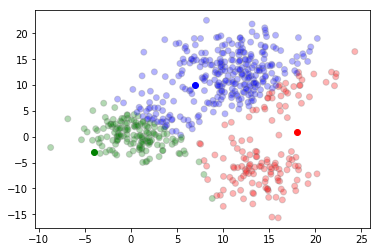

In [18]:
plt.scatter(df2['x'], df2['y'], c=df2['color'], alpha=0.3, edgecolor='gray')
set_centers(centers)
plt.show();
plt.close()

## 센트로이드 업데이트
각 군집에 속한 점들 좌표의 평균으로 센트로이드의 좌표를 업데이트

In [19]:
from copy import deepcopy
def update_centers(df, centers):
    k = deepcopy(centers)
    for i in k.keys():
        k[i][0] = df[df['closet'] == i]['x'].mean()
        k[i][1] = df[df['closet'] == i]['y'].mean()
    return k

In [20]:
centers

{1: [18, 1], 2: [-4, -3], 3: [7, 10]}

In [21]:
centers2 = update_centers(df2, centers)
centers2

{1: [14.743414060047339, -2.5661204733987524],
 2: [0.36212422724698201, 0.090581121568124895],
 3: [10.025201573491508, 11.458297977791414]}

### 화살표 그리기

In [22]:
def draw_arrow(old, new):
    ax = plt.axes()
    for i in old.keys():
        old_x = old[i][0]
        old_y = old[i][1]
        new_x = new[i][0]
        new_y = new[i][1]
        dx = (new_x - old_x) * 0.8
        dy = (new_y - old_y) * 0.8

        ax.arrow(old_x, old_y, dx, dy, head_width=1, head_length=2, fc=color_map[i], ec=color_map[i])

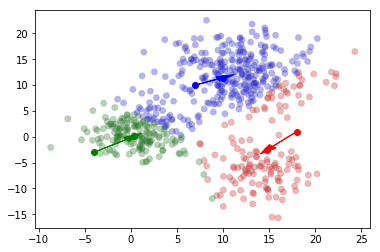

In [23]:
old = deepcopy(centers)
new = deepcopy(centers2)
plt.scatter(df2['x'], df2['y'], c=df2['color'], alpha=0.3, edgecolor='gray')
set_centers(old)
set_centers(new)
draw_arrow(old, new)
plt.show();
plt.close()

## closet 업데이트 하기

In [24]:
def draw_points(df):
    plt.scatter(df['x'], df['y'], c=df['color'], alpha=0.3, edgecolor='gray')

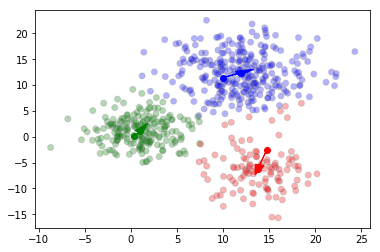

In [25]:
df3 = update_points(df2.copy(), centers2)
draw_points(df3)
centers3 = update_centers(df3, centers2)
old = deepcopy(centers2)
new = deepcopy(centers3)
set_centers(old)
set_centers(new)
draw_arrow(old, new)
plt.show();
plt.close()

## 지저분해!
`df2`며 `df3`며 `centers2`에 난리났다

In [26]:
np.random.seed(21)
k = 3
pt1 = generate_points(1, 3, (200, 2), (0, 0))
pt2 = generate_points(2, 4, (300, 2), (10, 10))
pt3 = generate_points(3, 3, (100, 2), (10, -10))
points = np.concatenate((pt1, pt2, pt3))
df = DataFrame(points, columns=['x', 'y'])
df.head()

,x,y
0,0.844107,0.666412
1,4.125390,-2.770218
2,3.236163,-4.133161
3,0.382407,0.296286
4,4.384432,0.962122


In [27]:
np.random.seed(21)
centers = {
    i+1: [np.random.randint(*init_xy[0]), np.random.randint(*init_xy[1])]
    for i in range(k)
}
centers

{1: [1, 0], 2: [-4, 20], 3: [2, -7]}

In [28]:
df = update_points(df.copy(deep=True), centers)
df.head()

,x,y,from_1,from_2,from_3,closet,color
0,0.844107,0.666412,0.684403,19.931207,7.753061,1,r
1,4.125390,-2.770218,4.176383,24.176534,4.733745,1,r
2,3.236163,-4.133161,4.699303,25.194673,3.121997,3,b
3,0.382407,0.296286,0.684987,20.185188,7.473446,1,r
4,4.384432,0.962122,3.518531,20.802392,8.311492,1,r


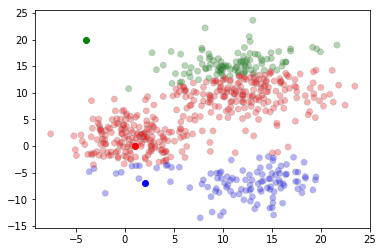

In [29]:
draw_points(df)
set_centers(centers)
plt.show();
plt.close()

## 만들어 둔건 아까우니 여기부터 시작하자

In [30]:
for _ in range(100):
    df = df.copy(deep=True)
    centers = deepcopy(centers)
    old_closet = df['closet'].copy(deep=True)
    
    centers = update_centers(df, centers)
    for i in centers.keys():
        print("{}: ({:05.2f}, {:05.2f})".format(i, centers[i][0], centers[i][1]))
    print("=============")
    df = update_points(df, centers)
    if df['closet'].equals(old_closet):
        print("더 이상 변동 없음")
        break

1: (06.89, 05.63)
2: (10.88, 15.55)
3: (11.88, -6.79)
1: (03.60, 03.42)
2: (12.72, 13.29)
3: (12.24, -6.52)
1: (01.53, 01.82)
2: (12.41, 12.17)
3: (13.35, -6.70)
1: (01.13, 01.36)
2: (12.15, 11.94)
3: (13.42, -6.72)
1: (01.10, 01.34)
2: (12.13, 11.93)
3: (13.42, -6.72)
1: (01.07, 01.32)
2: (12.12, 11.90)
3: (13.42, -6.72)
더 이상 변동 없음


## 최종 결과물

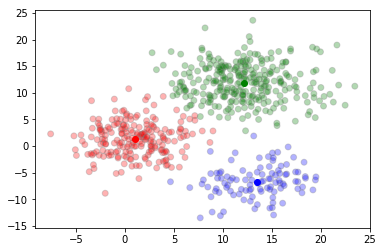

In [31]:
draw_points(df)
set_centers(centers)
plt.show();
plt.close()

# Animation 으로 시각화
- [참고 블로그 1](http://flothesof.github.io/k-means-numpy.html)
- [참고 블로그 2](http://eli.thegreenplace.net/2016/drawing-animated-gifs-with-matplotlib/)
- [ImageMagick 다운로드](https://www.imagemagick.org/script/download.php)
- [macOS 환경에서 추가 설치](http://stackoverflow.com/questions/13316397/matplotlib-animation-no-moviewriters-available): `RuntimeError: No MovieWriters available!`에러 발생시

In [32]:
from JSAnimation import IPython_display
from matplotlib import animation

In [33]:
def update_distance(df, centers):
    for i in centers.keys():
        df['from_{}'.format(i)] = np.sqrt((df['x'] - centers[i][0]) ** 2 + (df['y'] - centers[i][1]) ** 2)
    return df

In [34]:
def assign_center(df):
    df['closet'] = df.ix[:, ['from_{}'.format(i) for i in centers.keys()]].idxmin(axis=1)
    df['closet'] = df['closet'].apply(lambda x: int(x[-1]))
    return df

In [40]:
def update_points(df, centers):
    _df = update_distance(df, centers)
    _df = assign_center(_df)
    return _df

In [41]:
np.random.seed(201)
k = 3
pt1 = generate_points(1, 3, (200, 2), (0, 0))
pt2 = generate_points(2, 4, (300, 2), (10, 10))
pt3 = generate_points(3, 3, (100, 2), (10, -10))
points = np.concatenate((pt1, pt2, pt3))
source = DataFrame(points, columns=['x', 'y'])
centers = {
    i+1: [np.random.randint(*init_xy[0]), np.random.randint(*init_xy[1])]
    for i in range(k)
}
df = update_points(source.copy(deep=True), centers)

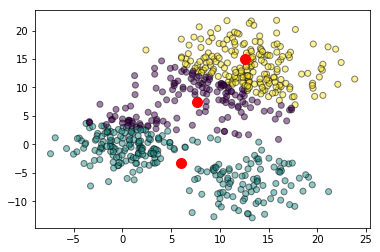

In [42]:
fig = plt.figure()
ax = plt.axes()

def init():
    return

def animate(i):
    global centers, df
    df = df.copy(deep=True)
    centers = deepcopy(centers)
    old_closet = df['closet'].copy(deep=True)
    
    centers = update_centers(df, centers)
    df = update_points(df, centers)
    
    ax.cla()
    ax.scatter(df['x'], df['y'], c=df['closet'], edgecolor='black', alpha=0.5)
    # plt.gray()
    for i in centers.keys():
        ax.scatter(*centers[i], c='r', s=100)

ani = animation.FuncAnimation(fig, animate, frames=10, interval=200)

In [43]:
ani.save('k-means.gif', dpi=150, writer='imagemagick', fps=10)